In this notebook we want to explore some simple cases for standing waves. Refer to 01c_standingwaves.ipynb for the relevant equations.

# Import needed packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.html.widgets import interact, fixed
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Function definitions

In [2]:
def standingwave(v0,f,beta,z,gammaLmagnitude,gammaLphase_rad):
    return v0*np.sqrt(1 + 2*gammaLmagnitude*np.cos(2*beta*z + gammaLphase_rad) + gammaLmagnitude**2)

# Return string containing text version of complex number
# Handle special cases: angle = 0, pi, -pi, pi/2, and -pi/2
def complextostring(complexnum): 
    tolerance = 1.0e-3
    angle = np.angle(complexnum)
    if angle < tolerance and angle > -tolerance: # angle is essentially 0.0
        tempstr = "%.2f" % abs(complexnum)
    elif angle > np.pi - tolerance or angle < -np.pi + tolerance: # angle close to +pi or -pi?
        tempstr = "-%.2f" % abs(complexnum)
    elif angle < np.pi/2 + tolerance and angle > np.pi/2 - tolerance: # angle close to np.pi/2?
        tempstr = "j%.2f" % abs(complexnum)
    elif angle < -np.pi/2 + tolerance and angle > -np.pi/2 - tolerance: # angle close to -np.pi/2?
        tempstr = "-j%.2f" % abs(complexnum)
    else:
        tempstr = "%.2f exp(j%.2f)" % (abs(complexnum), np.angle(complexnum))
    return tempstr

# Plot voltage standing wave

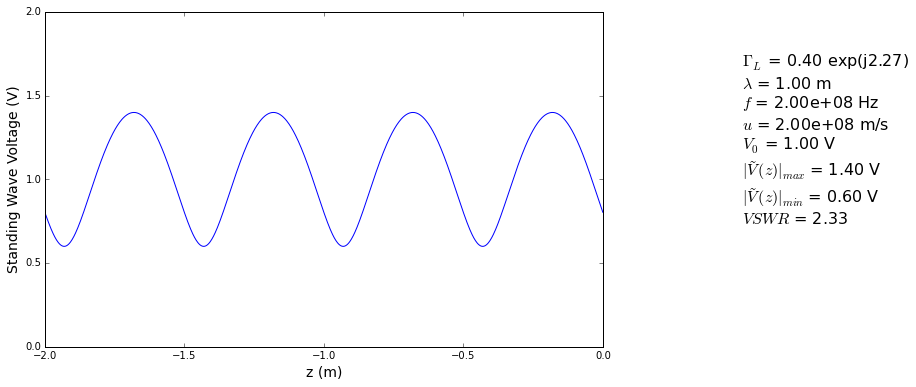

In [3]:
zmin = -2
zmax = 0
numpnts = 1000
v0 = 1.0
u_mps = 2.0e8
frequency_Hz = 2.0e8
wavelength_m = u_mps / frequency_Hz
def plotstandingwave(v0,f,beta,gammaLmagnitude,gammaLphase_deg):
    z = np.linspace(zmin,zmax,numpnts)
    gammaLphase_rad = np.radians(gammaLphase_deg)
    vstandingwave = standingwave(v0,f,beta,z,gammaLmagnitude,gammaLphase_rad)
    standingwavemax = max(vstandingwave)
    standingwavemin = min(vstandingwave)
    if standingwavemin > 1.0e-2:
        vswr_text = standingwavemax/standingwavemin
        vswr_text = '\n$VSWR$ = %.2f' % vswr_text
    else:
        vswr_text = '\n$VSWR$ = $\infty$'
    # Set up text for plot label
    reflcoeffcmplx = gammaLmagnitude * complex(np.cos(gammaLphase_rad),np.sin(gammaLphase_rad))
    labeltext = '$\Gamma_L$ = ' + complextostring(reflcoeffcmplx)
    labeltext += '\n$\lambda$ = %.2f m' % wavelength_m
    labeltext += '\n$f$ = %.2e Hz' % frequency_Hz
    labeltext += '\n$u$ = %.2e m/s' % u_mps
    labeltext += '\n$V_0$ = %.2f V' % v0
    labeltext += '\n$|\~V (z)|_{max}$ = %.2f V' % standingwavemax
    labeltext += '\n$|\~V (z)|_{min}$ = %.2f V' % standingwavemin
    labeltext += vswr_text
    # Create plot
    plt.plot(z,vstandingwave)
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    plt.ylim(0,2.0)
    plt.xlabel('z (m)',fontsize=14)
    plt.ylabel('Standing Wave Voltage (V)',fontsize=14)
    plt.text(0.5,0.75,labeltext,fontsize=16)

interact(plotstandingwave, 
         v0=fixed(v0), 
         f=fixed(frequency_Hz),
         beta=fixed(2.0*np.pi/wavelength_m),
         gammaLmagnitude=(0.0,1.0,0.1),
         gammaLphase_deg=(-180,180,10));